# HoloLens Data

## Round trip system-hololens, Reception to Update function, frame time of the internal device, and packet loss

In [1]:
#packages
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
def descriptive_stats(dataframe, div = 1.0, roundDec = 3):
    stats = (dataframe.describe(include='all').transpose().filter (['min', '50%','mean', 'max', 'std']).set_axis(['Min.', 'Median', 'Mean', 'Max.', 'Std. Dev.'], axis = 1) / div).round(roundDec)
    print(stats.to_latex())

def processData(frametime_update_task, xlabel, ylabel, figfile, funcMeans):
    print("SIZE: " + str(frametime_update_task.shape[0]))
    
    descriptive_stats(frametime_update_task)

    boxdata = frametime_update_task.transpose().values.tolist()
    fig, ax = plt.subplots()
    ax.boxplot(boxdata)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(figfile)
    plt.show()

    d1, d2, d3, d4, d5, d6, d7, d8 = x = frametime_update_task.transpose().values.tolist()
    levene_result = levene(d1, d2, d3, d4, d5, d6, d7, d8)
    print("levene:\n" + str(levene_result))
    anova_result = funcMeans(d1, d2, d3, d4, d5, d6, d7, d8)
    print("Anova or kruskal:\n" + str(anova_result))
    
def mean_std_process(data, ylabelmean, ylabelstd, figfile):
    #Means and Std
    colors = plt.rcParams["axes.prop_cycle"]()
    means = np.mean(data.transpose().values, axis = 1)
    stds = np.std(data.transpose().values, axis = 1)
    agentsize = np.arange(1,9,1)
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    axs[0].plot(agentsize, means, color = next(colors)["color"])
    axs[0].set_title('a) Mean')
    axs[0].set_xlabel('Agent Size')
    axs[0].set_ylabel(ylabelmean)
    axs[1].plot(agentsize, stds, color = next(colors)["color"])
    axs[1].set_title('a) Standard Deviation')
    axs[1].set_xlabel('Agent Size')
    axs[1].set_ylabel(ylabelstd)
    plt.savefig(figfile)
    plt.show()

def extractGroup(data_collection, name):    
    headers = []
    for i in range(8):
        headers.append(name + str(i+1))
    data = []
    for i in range(8):
        data_collection[i][name].name =str(i+1)
        data.append(data_collection[i][name])   
    return pd.concat(data, axis = 1)


## Round Trip System - HoloLens

SIZE: 500
\begin{tabular}{lrrrrr}
\toprule
{} &  Min. &  Median &    Mean &   Max. &  Std. Dev. \\
\midrule
agent\_ms\_1 &   0.0 &    11.0 &  12.146 &   49.0 &      5.951 \\
agent\_ms\_2 &   0.0 &    12.0 &  13.794 &   64.0 &      8.113 \\
agent\_ms\_3 &   0.0 &    12.0 &  14.870 &   66.0 &      9.791 \\
agent\_ms\_4 &   0.0 &    12.0 &  14.826 &  105.0 &     11.018 \\
agent\_ms\_5 &   0.0 &    12.0 &  16.002 &  103.0 &     12.307 \\
agent\_ms\_6 &   0.0 &    12.0 &  16.450 &  164.0 &     15.655 \\
agent\_ms\_7 &   0.0 &    12.0 &  15.894 &   78.0 &     11.080 \\
agent\_ms\_8 &   0.0 &    14.0 &  19.742 &  114.0 &     14.824 \\
\bottomrule
\end{tabular}



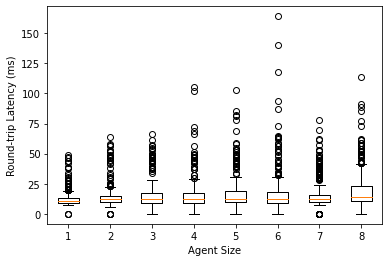

levene:
LeveneResult(statistic=18.780731038171982, pvalue=8.277855974919683e-25)
Anova or kruskal:
KruskalResult(statistic=170.25816877334555, pvalue=2.2147104131648717e-33)


<Figure size 432x288 with 0 Axes>

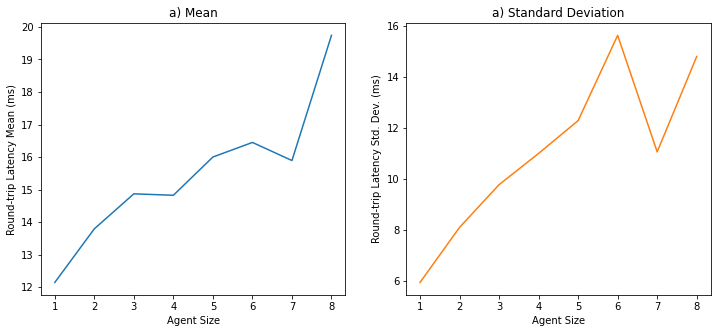

In [3]:
roundtrip_data = pd.read_csv('./FinalDatasets/hololens/system-to-hololens-roundtrip.csv')
processData(roundtrip_data, 'Agent Size', 'Round-trip Latency (ms)', 'figures/5-hololens/roundtrip-holo-boxplot.pdf', kruskal)
mean_std_process(roundtrip_data, 'Round-trip Latency Mean (ms)', 'Round-trip Latency Std. Dev. (ms)', 'figures/5-hololens/roundtrip-holo-mean-std.pdf')

## Reception to Update Function - HoloLens

SIZE: 500
\begin{tabular}{lrrrrr}
\toprule
{} &  Min. &  Median &    Mean &  Max. &  Std. Dev. \\
\midrule
1 &   0.0 &     9.0 &   8.916 &  18.0 &      4.692 \\
2 &   0.0 &    10.0 &   9.050 &  18.0 &      5.090 \\
3 &   0.0 &    10.0 &   9.534 &  23.0 &      4.894 \\
4 &   0.0 &    10.5 &   9.648 &  19.0 &      5.099 \\
5 &   0.0 &    10.0 &  10.080 &  20.0 &      4.762 \\
6 &   0.0 &    10.0 &   9.634 &  19.0 &      4.834 \\
7 &   0.0 &     9.0 &   9.084 &  19.0 &      4.817 \\
8 &   0.0 &     9.0 &   9.070 &  18.0 &      4.769 \\
\bottomrule
\end{tabular}



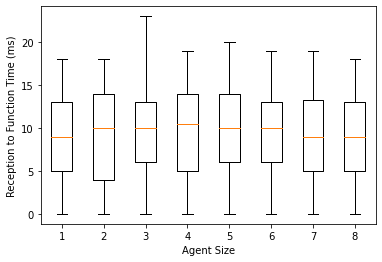

levene:
LeveneResult(statistic=1.834840025734817, pvalue=0.07632725532285631)
Anova or kruskal:
F_onewayResult(statistic=3.484873718329491, pvalue=0.000994649115821257)


In [4]:
#Load files
internal_holo_data = []
for i in range(1, 9):
    internal_holo_data.append(pd.read_csv('./FinalDatasets/hololens/receptiontoframe-framerate-'+ str(i) +'.csv'))

reception_to_frame_data = extractGroup(internal_holo_data, 'reception-to-frame')
processData(reception_to_frame_data, 'Agent Size', 'Reception to Function Time (ms)', 'figures/5-hololens/reception-to-frame-holo-boxplot.pdf', f_oneway)


SIZE: 500
\begin{tabular}{lrrrrr}
\toprule
{} &  Min. &  Median &    Mean &  Max. &  Std. Dev. \\
\midrule
1 &  12.0 &    17.0 &  16.568 &  21.0 &      1.152 \\
2 &  13.0 &    17.0 &  16.592 &  20.0 &      1.213 \\
3 &  10.0 &    16.0 &  16.526 &  23.0 &      2.444 \\
4 &   9.0 &    16.0 &  16.412 &  26.0 &      2.345 \\
5 &   7.0 &    16.0 &  16.292 &  28.0 &      2.031 \\
6 &   8.0 &    17.0 &  16.522 &  25.0 &      2.296 \\
7 &   8.0 &    17.0 &  16.584 &  22.0 &      1.598 \\
8 &   8.0 &    16.0 &  16.464 &  21.0 &      1.254 \\
\bottomrule
\end{tabular}



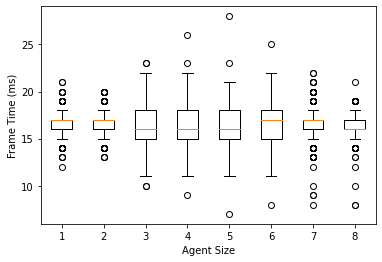

levene:
LeveneResult(statistic=87.15081114392243, pvalue=1.8354998890678209e-118)
Anova or kruskal:
KruskalResult(statistic=14.949775823789777, pvalue=0.03664862125059476)


In [5]:
frame_to_frame_data = extractGroup(internal_holo_data, 'frame-time')
processData(frame_to_frame_data, 'Agent Size', 'Frame Time (ms)', 'figures/5-hololens/frame-frame-holo-boxplot.pdf', kruskal)

## Packet Loss

SIZE: 30
\begin{tabular}{lrrrrr}
\toprule
{} &   Min. &  Median &    Mean &    Max. &  Std. Dev. \\
\midrule
0 &  16.60 &  19.263 &  19.077 &  21.250 &      1.101 \\
1 &  18.25 &  20.300 &  20.798 &  25.150 &      1.955 \\
2 &  18.25 &  20.100 &  20.331 &  23.800 &      1.409 \\
3 &  18.25 &  20.230 &  20.708 &  24.700 &      1.616 \\
4 &  20.05 &  21.650 &  21.720 &  24.550 &      1.084 \\
5 &  21.85 &  24.300 &  24.144 &  26.200 &      1.131 \\
6 &  21.20 &  23.525 &  23.562 &  26.313 &      1.148 \\
7 &  22.00 &  23.850 &  23.890 &  25.900 &      0.982 \\
\bottomrule
\end{tabular}



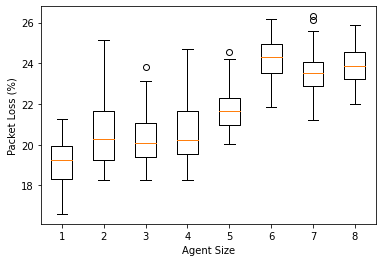

levene:
LeveneResult(statistic=3.2092556050934693, pvalue=0.002893962213161598)
Anova or kruskal:
KruskalResult(statistic=153.78588599876943, pvalue=6.503138339428045e-30)


<Figure size 432x288 with 0 Axes>

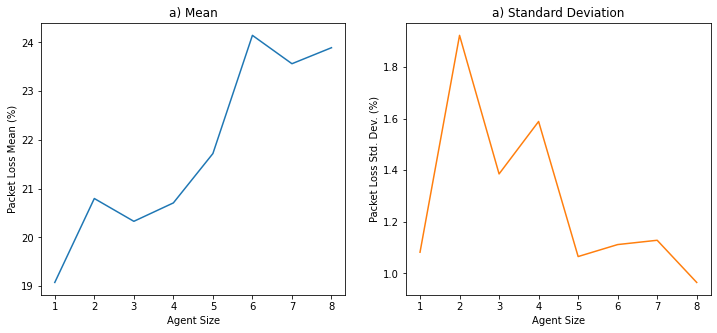

In [6]:
#Load files
packets_holo_data = []
for i in range(1, 9):
    data = pd.read_csv('./FinalDatasets/hololens/packets-system-hololens-'+ str(i) +'.csv')
    pkg_loss = (data['pk_send'] - data['pk_receive']) * 100.0 / data['pk_send']
    packets_holo_data.append(pkg_loss)
packets_holo_data = pd.DataFrame(np.array(packets_holo_data).transpose())
processData(packets_holo_data, 'Agent Size', 'Packet Loss (%)', 'figures/5-hololens/packetloss-holo-boxplot.pdf', kruskal)
mean_std_process(packets_holo_data, 'Packet Loss Mean (%)', 'Packet Loss Std. Dev. (%)', 'figures/5-hololens/packetloss-holo-mean-std.pdf')
